# State of NewYork Retail Food Stores EDA

A listing of all retail food stores which are licensed by the Department of Agriculture and Markets. 


Dataset Source : https://catalog.data.gov/dataset/retail-food-stores

In [16]:
## Load libraries
import pandas as pd
import numpy as np
import calendar
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

warnings.filterwarnings("ignore")
retail_food_stores_df = pd.read_csv(r"C:\Users\jki\Downloads\Retail_Food_Stores.csv")
retail_food_stores_df.head(5)

,County,License Number,Operation Type,Establishment Type,Entity Name,DBA Name,Street Number,Street Name,Address Line 2,Address Line 3,City,State,Zip Code,Square Footage,Georeference
0,Bronx,755553,Store,JAC,LA DIANA BAKERY SHOP CORP,LA DIANA BAKERY SHOP,2712B,E RETMONT AVE,NaN,NaN,BRONX,NY,10461,0,NaN
1,Bronx,749844,Store,A,CONVENIENCE 336 CORP,CONVENIENCE 336,336,E 167TH ST,NaN,NaN,BRONX,NY,10456,800,POINT (-73.91264 40.83102)
2,Bronx,739247,Store,JAC,WB DELI & GROCERY INC,WB DELI & GROCERY,756,UNION AVE,NaN,NaN,BRONX,NY,10455,0,POINT (-73.90356 40.81776)
3,Bronx,745933,Store,A,ISMAEL ONVENIENCE STORE CORP,ISMAEL CONVENIENCE STOR,689NE,1187TH ST,NaN,NaN,BRONX,NY,10458,0,NaN
4,Bronx,749047,Store,JAC,FERS GRILL DELI INC,NaN,2962,JEROME AVENUE,NaN,NaN,BRONX,NY,10468,1200,POINT (-73.88961 40.87283)


In [17]:
retail_food_stores_df.head(5)

,County,License Number,Operation Type,Establishment Type,Entity Name,DBA Name,Street Number,Street Name,Address Line 2,Address Line 3,City,State,Zip Code,Square Footage,Georeference
0,Bronx,755553,Store,JAC,LA DIANA BAKERY SHOP CORP,LA DIANA BAKERY SHOP,2712B,E RETMONT AVE,NaN,NaN,BRONX,NY,10461,0,NaN
1,Bronx,749844,Store,A,CONVENIENCE 336 CORP,CONVENIENCE 336,336,E 167TH ST,NaN,NaN,BRONX,NY,10456,800,POINT (-73.91264 40.83102)
2,Bronx,739247,Store,JAC,WB DELI & GROCERY INC,WB DELI & GROCERY,756,UNION AVE,NaN,NaN,BRONX,NY,10455,0,POINT (-73.90356 40.81776)
3,Bronx,745933,Store,A,ISMAEL ONVENIENCE STORE CORP,ISMAEL CONVENIENCE STOR,689NE,1187TH ST,NaN,NaN,BRONX,NY,10458,0,NaN
4,Bronx,749047,Store,JAC,FERS GRILL DELI INC,NaN,2962,JEROME AVENUE,NaN,NaN,BRONX,NY,10468,1200,POINT (-73.88961 40.87283)


In [18]:
# lets have a look at the data types
retail_food_stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28520 entries, 0 to 28519
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   County              28520 non-null  object 
 1   License Number      28520 non-null  int64  
 2   Operation Type      28520 non-null  object 
 3   Establishment Type  28520 non-null  object 
 4   Entity Name         28520 non-null  object 
 5   DBA Name            28513 non-null  object 
 6   Street Number       28361 non-null  object 
 7   Street Name         28520 non-null  object 
 8   Address Line 2      0 non-null      float64
 9   Address Line 3      0 non-null      float64
 10  City                28518 non-null  object 
 11  State               28520 non-null  object 
 12  Zip Code            28520 non-null  int64  
 13  Square Footage      28520 non-null  int64  
 14  Georeference        28295 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 3.3

## 1 What is the average square feet

In [27]:
retail_food_stores_df['Square Footage'].mean()

rounded_retail_food_stores_average = round(retail_food_stores_df['Square Footage'].mean())
print(rounded_retail_food_stores_average)

4954


## 2 What is the maximum square feet

In [28]:
retail_food_stores_df['Square Footage'].max()

500000

## 3 What are the top five counties with the highest square feet

County
Suffolk    13108005
Kings      12387510
Erie       11122603
Queens      9300961
Nassau      8994623
Name: Square Footage, dtype: int64


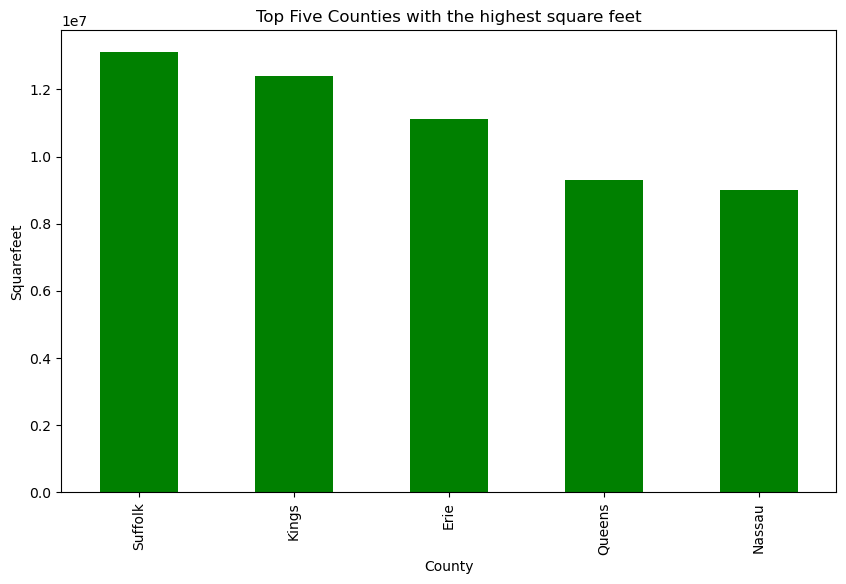

In [24]:
# Group by 'County' and calculate the sum of 'squarefeet'
squarefeet_count = retail_food_stores_df.groupby('County')['Square Footage'].sum()

# Sort the values in descending order and select the top five
top_five_squarefeet_count = squarefeet_count.sort_values(ascending=False).head(5)

# Display the result
print(top_five_squarefeet_count)

# Plot the top five County
top_five_squarefeet_count.plot(kind='bar', color='green', figsize=(10, 6))
plt.title('Top Five Counties with the highest square feet')
plt.xlabel('County')
plt.ylabel('Squarefeet')
plt.show()

## 4 What are the top Cities with the highest square feet

City
BROOKLYN     12384960
NEW YORK      7033374
BRONX         5466758
BUFFALO       3476965
ROCHESTER     2875322
Name: Square Footage, dtype: int64


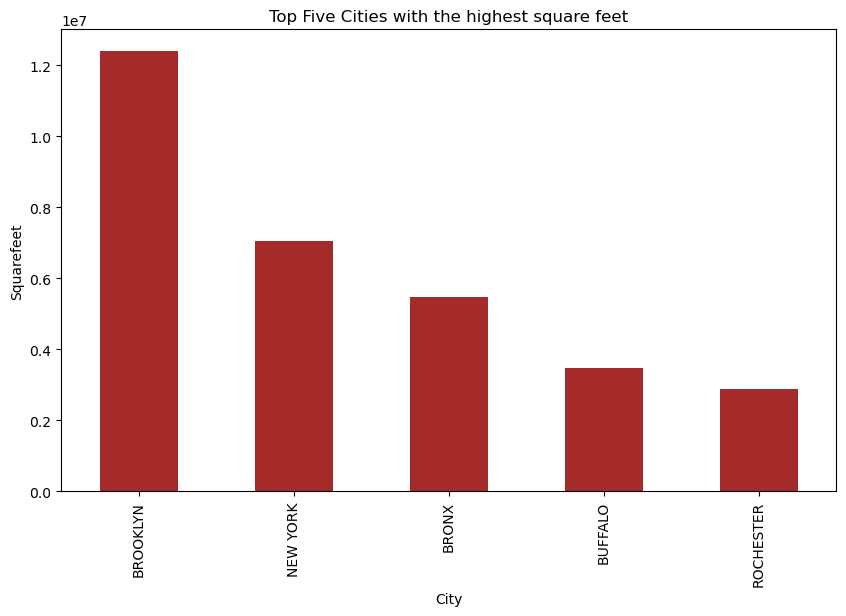

In [30]:
# Group by 'City' and calculate the sum of 'squarefeet'
squarefeet_count = retail_food_stores_df.groupby('City')['Square Footage'].sum()

# Sort the values in descending order and select the top five
top_five_squarefeet_count = squarefeet_count.sort_values(ascending=False).head(5)

# Display the result
print(top_five_squarefeet_count)

# Plot the top five Cities
top_five_squarefeet_count.plot(kind='bar', color='brown', figsize=(10, 6))
plt.title('Top Five Cities with the highest square feet')
plt.xlabel('City')
plt.ylabel('Squarefeet')
plt.show()